# Spotify Collaborations Extended EDA 

### Initial Set Up

#### Importing Packages

In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [5]:
top_us = pd.read_csv("../data/2021.01.04 spotify_us_collab_fe.csv")
top_us.head()

,Unnamed: 0,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,...,Song_consec_day,Artist_first_onchart,Artist_cumu_songs,Artist_cumu_collab,Artist_cumu_solo,Artist_days_onchart,Collab_avg_days_onchart,Collab_avg_cumu_songs,Collab_avg_cumu_collab,Collab_avg_cumu_solo
0,0,2017-01-01,Lighthouse - Andrelli Remix,149929,183,Hearts & Colors,1,2,"['post-teen pop', 'viral pop']",04CttTezSnv71USiiG9mIo,...,1,2017-01-01,1,1,0,1,1.0,1.000000,1.000000,0.0
1,1,2017-01-01,Lighthouse - Andrelli Remix,149929,183,Andrelli,2,2,['swedish pop'],04CttTezSnv71USiiG9mIo,...,1,2017-01-01,1,1,0,1,1.0,1.000000,1.000000,0.0
2,2,2017-01-01,In the Name of Love,435945,27,Martin Garrix,1,2,"['big room', 'dance pop', 'edm', 'electro hous...",04DwTuZ2VBdJCCC5TROn7L,...,1,2017-01-01,1,1,0,1,1.0,2.000000,1.500000,0.5
3,3,2017-01-01,In the Name of Love,435945,27,Bebe Rexha,2,2,"['dance pop', 'electropop', 'pop', 'pop dance'...",04DwTuZ2VBdJCCC5TROn7L,...,1,2017-01-01,3,2,1,1,1.0,2.000000,1.500000,0.5
4,4,2017-01-01,Party,151474,178,Chris Brown,1,3,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",05Z7jet4VDNVgNQWcYHnrk,...,1,2017-01-01,1,1,0,1,1.0,1.666667,1.666667,0.0


#### Basic Information For Each Column

In [33]:
top_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273601 entries, 0 to 273600
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               273601 non-null  int64  
 1   Date                     273601 non-null  object 
 2   Track Name               273601 non-null  object 
 3   Streams                  273601 non-null  int64  
 4   Position                 273601 non-null  int64  
 5   Artist Name              273601 non-null  object 
 6   Artist No.               273601 non-null  int64  
 7   No. of Artists           273601 non-null  int64  
 8   Artist Genre             273601 non-null  object 
 9   Track URI                273601 non-null  object 
 10  Country                  273601 non-null  object 
 11  Artist URI               273601 non-null  object 
 12  Album URI                273601 non-null  object 
 13  Album_release_month      273601 non-null  int64  
 14  Albu

#### Checking For Any Nulls

In [7]:
top_us.isnull().any()

Unnamed: 0                 False
Date                       False
Track Name                 False
Streams                    False
Position                   False
Artist Name                False
Artist No.                 False
No. of Artists             False
Artist Genre               False
Track URI                  False
Country                    False
Artist URI                 False
Album URI                  False
Album_release_month        False
Album_release_dayweek      False
Album Release              False
Year_chart                 False
Month_chart                False
Song_first_onchart         False
Song_days_since_first      False
Song_days_onchart          False
Song_days_since_release    False
Song_streak_id             False
Song_consec_day            False
Artist_first_onchart       False
Artist_cumu_songs          False
Artist_cumu_collab         False
Artist_cumu_solo           False
Artist_days_onchart        False
Collab_avg_days_onchart    False
Collab_avg

### Variables
1. **Date**: The date a given song appears on the Top 200 chart.
2. **Track Name**: Name of the track/song.
3. **Streams**: Number of streams on a given Date.
4. **Position**: Ranking according to number of streams in a region.
5. **Artist Name**: Name of the main artist.
6. **Artist No.**: The index of the collaborator for the given song when the dataframe is in long format (purely for stacking/unstacking/pivoting purposes). Collaborator No. 1 is usually the main artist.
7. **No. of Artists**: Number of distinct artists credited for a given song
8. **Artist Genre**: 
9. **Track URI**: Spotify's unique identifier for the song
10. **Country**: The country of the chart. This project uses the U.S. charts only
11. **Artist URI**: Spotify's unique identifier for the artist(s)
12. **Album URI**: Spotify's unique identifier for the album to which the song belongs
13. **Album_release_month**: The month component of Album Release date
14. **Album_release_dayweek**: The day of the week of the Album Release date
15. **Album Release**: The album's release date (may not always be accurate to the day)
16. **Year_chart**: The year component of Date
17. **Month_chart**: The month component of Date
18. **Song_first_onchart**: The earliest day a given song appears in a given country's chart
19. **Song_days_since_first**: The number of days elapsed between Song_first_onchart and the current Date
20. **Song_days_onchart**: The number of days the song has appeared on the chart in the given country
21. **Song_days_since_release**: The number of days elapsed between Album Release and the current chart date. CAUTION: because the Album release date is not always accurate to the day level, it is possible that the song may reach the chart before it is officially considered "released" by Spotify, leading to negative values for Song_days_since_release. Use with caution.
22. **Song_streak_id**: Unique identifier of a given song's streak in a given country
23. **Song_consec_day**: Unique identifier of a day within a unique streak id
24. **Artist_first_onchart**: The earliest day a given artist appears in a given country's chart
25. **Artist_cumu_songs**: The given artist's cumulative total number of songs up until the current Date
26. **Artist_cumu_collab**: The given artist's cumulative total number of collaborative songs up until the current date
27. **Artist_cumu_solo**: The given artist's cumulative total number of solo songs up until the current date
28. **Artist_days_onchart**: The given artist's cumulative number of days/appearance on a given country's chart up until the current Date
29. **Collab_avg_days_onchart**: The average number of days spent on the chart of all the collaborators credited in the song (up until the current date)
30. **Collab_avg_cumu_songs**: The average number of songs of each collaborator credited in the song (up until the current date)
31. **Collab_avg_cumu_collab**:The average number of collaborative songs of all the collaborators credited in the song (up until the current date)
32. **Collab_avg_cumu_solo**: The average number of solo songs of all the collaborators credited in the song (up until the current date)
33. **Day_week**: Day of the week, in 3-letter abbreviation
34. **Week_id_BB**: The ID of the week within a year, but resets on a Tuesday to match with Billboard's week.
35. **Week_mean_streams**: The mean number of streams for a given Year_week_id for a given country.

### Marginal distributions of key quantities of interest
We start investigating by gaining an overhead view of various parameters in our data. Let's start by doing so for some numeric variables, such as ```Position```, ```Streams```, ```No. of Artists```, ``` Artist Genre```, ```Collab_avg_days_onchart```, ```Collab_avg_cumu_songs```, and ```Song_days_since_release```.

In [35]:
top_us[['Position', 'Streams', 'No. of Artists', 'Artist Genre', 'Collab_avg_days_onchart', 'Collab_avg_cumu_songs', 'Song_days_onchart']].describe()

,Position,Streams,No. of Artists,Collab_avg_days_onchart,Collab_avg_cumu_songs,Song_days_onchart
count,273601.000000,2.736010e+05,273601.000000,273601.000000,273601.000000,273601.000000
mean,97.780392,3.967226e+05,2.571091,396.859248,29.508039,111.680973
std,57.674022,2.654753e+05,0.991199,282.705348,27.870607,138.674204
min,1.000000,1.254840e+05,2.000000,1.000000,1.000000,1.000000
25%,48.000000,2.367290e+05,2.000000,169.000000,9.000000,21.000000
50%,96.000000,3.039440e+05,2.000000,348.000000,20.666667,63.000000
75%,148.000000,4.590750e+05,3.000000,570.500000,41.500000,150.000000
max,200.000000,4.444027e+06,22.000000,1384.500000,204.000000,1137.000000


### All Streams By Position

Text(0.5, 1.0, 'Songs with higher streams are ranked higher in chart')

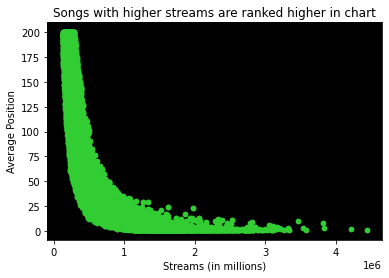

In [232]:
# graph average streams vs Position

ax1 = (
    top_us
    .plot.scatter(x="Streams", y="Position", color='limegreen')
)
ax1.set_xlabel("Streams (in millions)")
ax1.set_ylabel("Average Position")
ax1.set_facecolor('black')
ax1.set_title("Songs with higher streams are ranked higher in chart") # as expected

### Average Streams By Position

Text(0.5, 1.0, 'Songs with higher streams are ranked higher in chart')

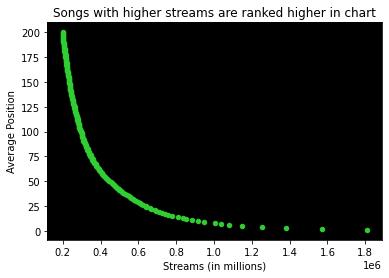

In [233]:
ax2 = (
    top_us.groupby(["Position"])["Streams"]
    .mean()
    .reset_index()
    .plot.scatter(x="Streams", y="Position", color='limegreen')
    
)
ax2.set_xlabel("Streams (in millions)")
ax2.set_ylabel("Average Position")
ax2.set_facecolor('black')
ax2.set_title("Songs with higher streams are ranked higher in chart")


### Top Genres On Top 200 Chart

In [122]:
top_us_genre = top_us[["Artist Name", "Artist Genre", "Position"]].copy()

top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre'].apply(lambda x: x.replace('[', ''))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.replace(']', ''))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.replace("'", ''))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.replace(', ', ','))
top_us_genre['Artist Genre Clean'] = top_us_genre['Artist Genre Clean'].apply(lambda x: x.split(','))

top_us_genre = top_us_genre.explode('Artist Genre Clean')
top_us_genre

,Artist Name,Artist Genre,Position,Artist Genre Clean
0,Hearts & Colors,"['post-teen pop', 'viral pop']",183,post-teen pop
0,Hearts & Colors,"['post-teen pop', 'viral pop']",183,viral pop
1,Andrelli,['swedish pop'],183,swedish pop
2,Martin Garrix,"['big room', 'dance pop', 'edm', 'electro hous...",27,big room
2,Martin Garrix,"['big room', 'dance pop', 'edm', 'electro hous...",27,dance pop
...,...,...,...,...
273599,DaBaby,"['north carolina hip hop', 'rap']",33,north carolina hip hop
273599,DaBaby,"['north carolina hip hop', 'rap']",33,rap
273600,Roddy Ricch,"['melodic rap', 'rap', 'trap']",33,melodic rap
273600,Roddy Ricch,"['melodic rap', 'rap', 'trap']",33,rap


Text(0.5, 1.0, 'Top 5 Most Frequent Generes for Top 200 Chart')

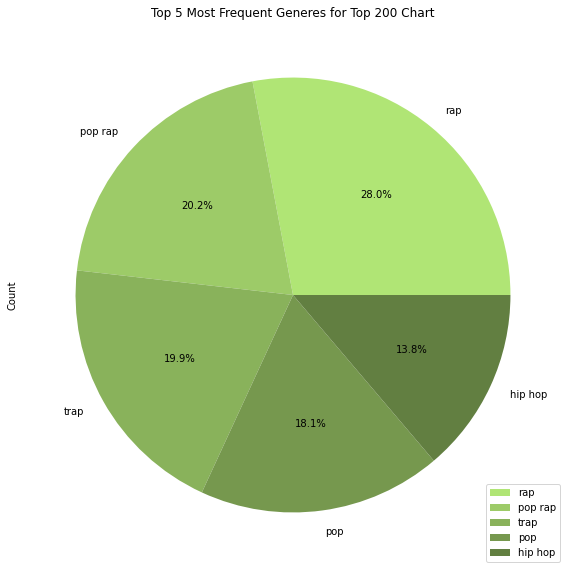

In [234]:
ax3 = (
    top_us_genre.groupby(["Artist Genre Clean"])["Position"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending= False)
    .head(5)
)

ax3=top_5_us_genre.set_index('Artist Genre Clean')

colors = ['#b0e575', '#9dcb68', '#89b25b', '#76984e', '#627f41']

ax3 = top_5_plot.plot(kind = 'pie', y = 'Count', autopct = '%1.1f%%', colors = colors, figsize = (10, 10))
ax3.set_title("Top 5 Most Frequent Generes for Top 200 Chart")

Text(0.5, 1.0, 'Top 5 Most Frequent Generes for Top 200 Chart')

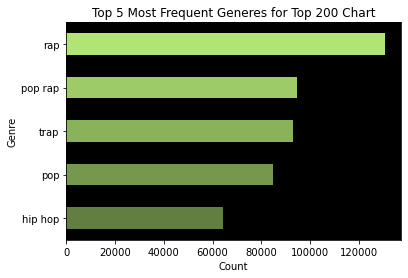

In [235]:
ax4 = top_5_us_genre.reset_index().plot.barh(x="Artist Genre Clean", y="Count", color = colors, )
ax4.set_facecolor('black')
ax4.invert_yaxis()
ax4.get_legend().remove()
ax4.set_xlabel("Count")
ax4.set_ylabel("Genre")
ax4.set_title("Top 5 Most Frequent Generes for Top 200 Chart")

### Seeing If Genres Differ Based on Top 10

In [159]:
top_10_positions = top_us_genre[top_us_genre['Position']<= 10]

top_10_positions = (
    top_10_positions.groupby(["Artist Genre Clean"])["Position"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending= False)
    .head(5)
)

top_10_positions = top_10_positions.set_index('Artist Genre Clean')

top_10_positions

,Count
Artist Genre Clean,
rap,9017
pop rap,5837
trap,5243
hip hop,3927
pop,3689


Text(0.5, 1.0, 'Top 5 Generes As Represented by The Top 10 Positions on The Top 200 Chart')

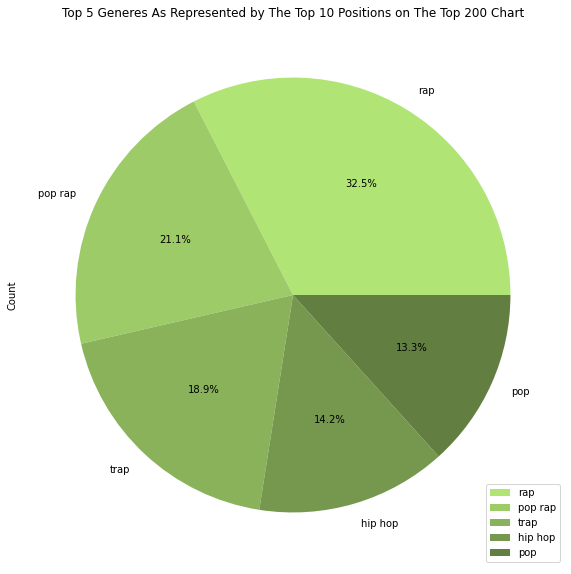

In [236]:
colors = ['#b0e575', '#9dcb68', '#89b25b', '#76984e', '#627f41']

ax5 = top_10_positions.plot.pie(y='Count', autopct='%1.1f%%', colors = colors, figsize=(10, 10))
ax5.set_title("Top 5 Generes As Represented by The Top 10 Positions on The Top 200 Chart")

Text(0.5, 1.0, 'Top 5 Most Frequent Generes for Top 200 Chart')

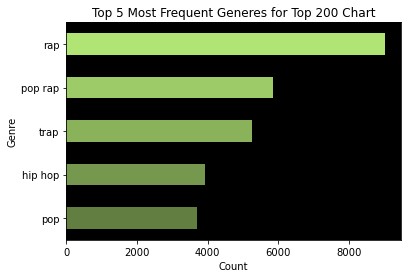

In [237]:
ax6 = top_10_positions.reset_index().plot.barh(x="Artist Genre Clean", y="Count", color = colors, )
ax6.set_facecolor('black')
ax6.invert_yaxis()
ax6.get_legend().remove()
ax6.set_xlabel("Count")
ax6.set_ylabel("Genre")
ax6.set_title("Top 5 Most Frequent Generes for Top 200 Chart")

### Average Position for Each Genre

In [181]:
top_5_us_genre_pos = (
    top_us_genre.groupby(["Artist Genre Clean","Position"])["Artist Name"]
    .count()
    .reset_index(name = 'Frequency')
    .groupby('Artist Genre Clean')
    .mean('Position')
    .reset_index()
    .sort_values(['Frequency'], ascending = [False])
    
    
)
top_5_us_genre_pos

,Artist Genre Clean,Position,Frequency
422,rap,100.500000,653.815
398,pop rap,100.500000,472.155
507,trap,100.500000,465.550
390,pop,100.500000,422.795
240,hip hop,100.500000,322.145
...,...,...,...
212,gaming dubstep,151.000000,1.000
426,rap francais,107.000000,1.000
427,rap kreyol,130.428571,1.000
209,future garage,188.000000,1.000


### Number Of Artists By Average Position

From the chart above,['dfw rap', 'melodic rap', 'rap'] seem to be the top genres among the top 10 (with ranking between the 1st and 10th) od the 200 chart in the US since 2017.  

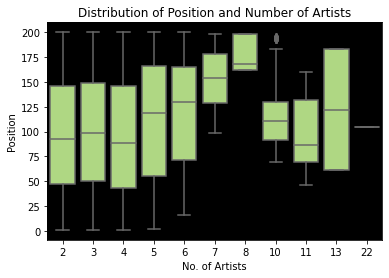

In [238]:
# boxplot graph for No of collaborators vs Position 
ax7 = sns.boxplot(x = 'No. of Artists', y='Position', data = top_us, color = '#b0e575' )
ax7.set_ylabel("Position")
ax7.set_title("Distribution of Position and Number of Artists")
ax7.set_facecolor('black')

Text(0.5, 1.0, 'Average Song Position and Number of Collaborators')

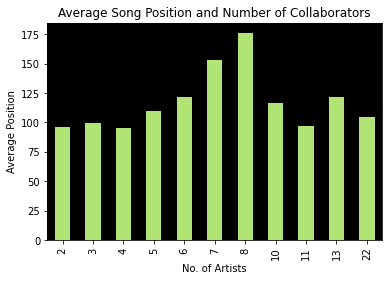

In [239]:
ax8 = (
    top_us.groupby(["No. of Artists"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Position", color = '#b0e575')
)
ax8.set_facecolor('black')
ax8.get_legend().remove()
ax8.set_xlabel("No. of Artists")
ax8.set_ylabel("Average Position")
ax8.set_title("Average Song Position and Number of Collaborators")

Songs with up to 4-artist collaboration rank higher on the chart 200 over all. Songs featuring 10 artsts and more seem to rank closer to the top charts perhaps because they are classic holiday/seasonal songs, or a large musical production. 

### Days on Chart Compared To Position

Text(0.5, 1.0, 'Days on the Chart Compared to the Position')

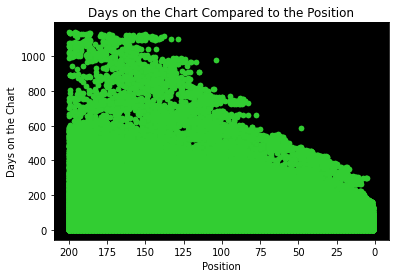

In [240]:
ax9 = (
    top_us.plot.scatter(x="Position", y="Song_days_onchart", color='limegreen')   
)

ax9.invert_xaxis()
ax9.set_facecolor('black')
ax9.set_xlabel("Position")
ax9.set_ylabel("Days on the Chart")
ax9.set_title("Days on the Chart Compared to the Position") 

Text(0.5, 1.0, 'Average Days on the Chart Compared to the Position')

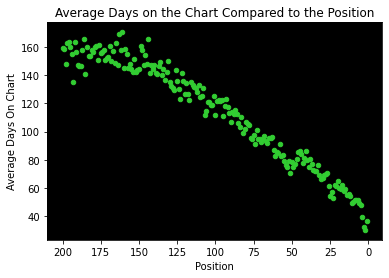

In [210]:
ax10 = (
    top_us.groupby(["Position"])["Song_days_onchart"]
    .mean()
    .reset_index()
    .sort_values(by="Position", ascending= True)
    .plot.scatter(x="Position", y="Song_days_onchart", color='limegreen')
)
ax10.invert_xaxis()
ax10.set_facecolor('black')
ax10.set_xlabel("Position")
ax10.set_ylabel("Average Days On Chart")
ax10.set_title("Average Days on the Chart Compared to the Position") 

Text(0.5, 1.0, 'Days on the Chart Compared to the Position')

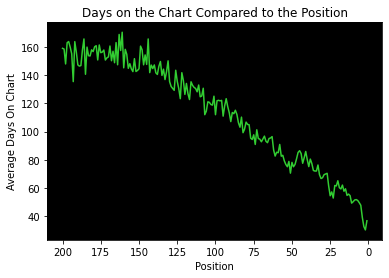

In [241]:
ax11 = (
    top_us.groupby(["Position"])["Song_days_onchart"]
    .mean()
    .reset_index()
    .sort_values(by="Position", ascending= True)
    .plot.line(x="Position", y="Song_days_onchart", color='limegreen')
)
ax11.invert_xaxis()
ax11.get_legend().remove()
ax11.set_facecolor('black')
ax11.set_xlabel("Position")
ax11.set_ylabel("Average Days On Chart")
ax11.set_title("Days on the Chart Compared to the Position") 

### Days on Chart Compared To Position For Top 10 Tracks

Text(0.5, 1.0, 'Days on the Chart Compared to the Position For Top 10')

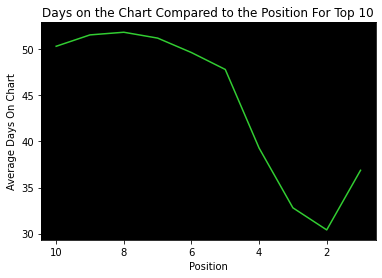

In [242]:
#graph days a song is on chart vs average position for songs ranked in top 10 
ax12 = (
    top_us[top_us['Position'] <= 10].groupby(["Position"])["Song_days_onchart"]
    .mean()
    .reset_index()
    .sort_values(by="Position", ascending= True)
    .plot.line(x="Position", y="Song_days_onchart", color='limegreen')
)
ax12.invert_xaxis()
ax12.get_legend().remove()
ax12.set_facecolor('black')
ax12.set_xlabel("Position")
ax12.set_ylabel("Average Days On Chart")
ax12.set_title("Days on the Chart Compared to the Position For Top 10") 

### Artist Days On Chart Compared to Track Position

In [1]:
# plotting Artist_days_onchart vs average position 
ax13 = (
    top_us.groupby(["Position"])["Artist_days_onchart"]
    .mean()
    .reset_index(name = 'Average Artist Days On Chart')
    .sort_values(by="Position", ascending=True)
    .plot.scatter(x="Position", y="Average Artist Days On Chart", color='limegreen')
)
ax13.set_facecolor('black')
ax13.set_xlabel("Position")
ax13.set_ylabel("Artist's Average Days on Chart")
ax13.set_title("Artist's Average Days on Chart Compared to Average Position ")

NameError: name 'top_us' is not defined

### Average Days On Chart Compared to Position for Collabs

Text(0.5, 1.0, "Collab's Average Days on Chart Compared to Average Position ")

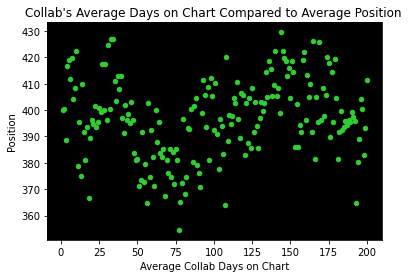

In [244]:
ax14 = (
    top_us.groupby(["Position"])["Collab_avg_days_onchart"]
    .mean()
    .reset_index(name = "Average Collab Days On Chart")
    .sort_values(by="Position", ascending=True)
    .plot.scatter(x="Position", y="Average Collab Days On Chart", color='limegreen')
)
ax14.set_facecolor('black')
ax14.set_xlabel("Position")
ax14.set_ylabel("Average Collab Days on Chart")
ax14.set_title("Collab's Average Days on Chart Compared to Average Position ")

## Investigating correlations - Havent Gone Through (JS)


In [281]:
# Create a correlation matrix
corr    = top_us.corr()
pos_cor = corr['Position'] >0
neg_cor = corr['Position'] <0
corr['Position'][pos_cor].sort_values(ascending = False)

Position                   1.000000
Song_days_since_first      0.274646
Song_streak_id             0.261527
Song_days_onchart          0.256863
Song_days_since_release    0.050872
No. of Artists             0.046438
Artist No.                 0.025811
Year_chart                 0.014811
Unnamed: 0                 0.010226
Collab_avg_days_onchart    0.007098
Artist_days_onchart        0.006121
Album_release_month        0.003664
Name: Position, dtype: float64

In [283]:
corr['Position'][neg_cor].sort_values()

Streams                  -0.745268
Collab_avg_cumu_songs    -0.057974
Collab_avg_cumu_solo     -0.055410
Collab_avg_cumu_collab   -0.051747
Song_consec_day          -0.047811
Artist_cumu_songs        -0.046756
Artist_cumu_solo         -0.042137
Artist_cumu_collab       -0.041958
Month_chart              -0.019041
Name: Position, dtype: float64